## **TPC2 - Exercício 1**

**Ana Filipa Rodrigues Pereira (PG46978) MEI**

--------------------

Para resolver este problema, foi necessário, em primeiro lugar, definir qual seria o formato do ficheiro de texto que serviria como *input*.
Ficou decidido o seguinte:

* Na primeira linha do ficheiro estará o tamanho do tabuleiro (N)
* Na segunda linha do ficheiro estará a quantidade de valores pré-definidos a colocar no tabuleiro (N1)
* Na terceira linha do ficheiro estará a quantidade de restrições de desigualdade a colocar no tabuleiro (N2)
* As N1 linhas seguintes serão a especificação dos valores a colocar e as suas posições no tabuleiro
* As N2 linhas seguintes serão a especificação das restrições de desigualdade bem como entre que posições estas se aplicam.


Imagine-se que um ficheiro input continha a informação abaixo descrita:

4

2

4

3 1 4

3 4 2

1 1 2 1 >

3 2 3 3 <

4 2 4 3 <

3 4 4 4 <


Isto significaria que:

* O tabuleiro tem tamanho 4x4
* Serão colocados 2 valores no tabuleiro
* Haverá quatro restrições de desigualdade
* Na linha 1 e coluna 3 será colocado o valor 2
* Na linha 3 e coluna 4 será colocado o valor 1
* O valor que está na linha 1 e coluna 1 terá de ser superior (>) ao valor que está na linha 2 e coluna 1
* O valor que está na linha 3 e coluna 2 terá de ser inferior (<) ao valor que está na linha 3 e coluna 3
* O valor que está na linha 4 e coluna 2 terá de ser inferior (<) ao valor que está na linha 4 e coluna 3
* O valor que está na linha 3 e coluna 4 terá de ser inferior (<) ao valor que está na linha 4 e coluna 4


Visualmente, o tabuleiro correspondente será:

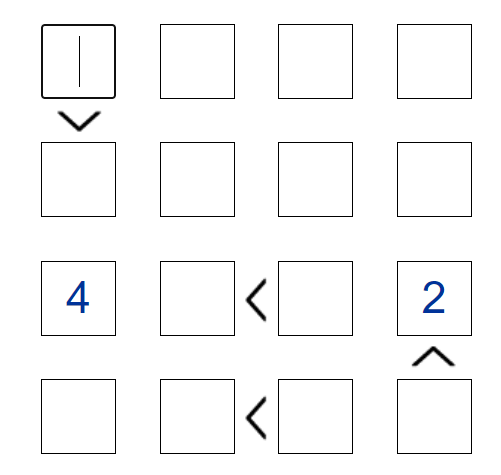




Sabendo isto,podemos passar para a resolução em Python.

---

Começamos por instalar o Z3.

In [2]:
!pip install z3-solver

     |████████████████████████████████| 33.0 MB 18 kB/s 


É necessário importar o módulo do Z3. O módulo numpy é também importado (explicarei mais à frente porquê)

In [3]:
from z3 import *
import numpy as np

Agora criamos um ficheiro de texto chamado 'tabuleiroF.txt' que irá conter a informação de um dado puzzle futoshiki. Este ficheiro é o mesmo que foi anteriormente usado para exemplo. Realça-se que apenas executo o bloco de código abaixo uma vez que não é possivel submeter um ficheiro de texto junto com o pdf. Assim, cria-se e preenche-se um ficheiro em python para que seja possível executar o código desenvolvido noutra máquina.

In [4]:
f = open("tabuleiroF.txt", "w")
f.write("4\r\n")
f.write("2\r\n")
f.write("4\r\n")
f.write("3 1 4\r\n")
f.write("3 4 2\r\n")
f.write("1 1 2 1 >\r\n")
f.write("3 2 3 3 <\r\n")
f.write("4 2 4 3 <\r\n")
f.write("3 4 4 4 <\r\n")
f.close()

Agora iremos abrir o ficheiro para leitura. Nome do ficheiro a abrir é definido na variável *file_name*. Neste caso coloco o nome 'tabuleiro.txt' o qual contém informação para um possível tabuleiro

In [11]:
file_name = "tabuleiroF.txt"
f = open(file_name, "r")
lines = f.readlines()

Inicia-se o solver

In [6]:
sol = Solver()

*lines* é um array cujos elementos são as linhas do ficheiro. Primeiramente, será preciso converter as 3 primeiras linhas do ficheiro para o inteiro

In [7]:
size = int(lines[0])
n1 = int(lines[1])
n2 = int(lines[2])

No pedaço de código abaixo, o raciocínio é o seguinte:

Primeiro ,com o if mais exterior,verifica-se se o tamanho do tabuleiro, a quantidades de restrições e a quantidade de valores a acrescentar são válidos. Caso sejam, entramos no ciclo. Se não forem, o programa termina, enviando uma mensagem de erro.É de realçar que um tabuleiro só pode ter um tamanho superior a zero, mas não é obrigatório que tenha restrições de desigualdade ou valores pré-definidos.

Caso estes valores sejam válidos, entra-se no if. Aqui dentro, vai ser preciso uma família de variáveis xij, pelo que foi criada uma matriz X para o efeito.

Posto isto, foram definidas e adicionadas ao solver 3 restrições essenciais:

impedir que as linhas tenham dígitos repetidos -> para qualquer i entre 1 e size, a linha X[ i ] tem de ser toda diferente (Distinct)
impedir que as colunas tenham dígitos repetidos -> para qualquer i entre 1 e size e para um j fixo, as várias posições X[ i ][ j ] tem de ser todas diferentes (Distinct)
garantir que no tabuleiro só haja valores entre 1 e size (tamanho do tabuleiro). -> X[ i ][ j ]<=size e X[ i ][ j ]>=1
Após isto verifica-se se n1 > 0, ou seja, se é necessário adicionar valores ao puzzle. Caso isto aconteça, recorre-se à função auxiliar check_range para verificar se os valores lido do ficheiro input são válido.Se não forem, o programa acaba sendo emitida uma mensagem de erro. Por outro lado, caso haja número a adicionar, será preciso ler as n1 linhas que contém a informação necessária, recorrendo-se a um ciclo for. Para cada valor que queiramos adicionar ao tabuleiro numa dada posição será preciso definir uma restrição para isso. Basta apenas garantir que X[ i ][ j ] == valor. É de realçar que o ciclo for possui como intervalo range(3,n1+3) uma vez que 3 e n1+3 são as linhas do input onde estão os números a colocar no tabuleiro e em que posições.

De seguida, temos outra condição: n2>0, ou seja, se existem restrições de desigualdade a acrescentar.Caso haja, recorre-se à função auxiliar check_range para verificar se os dados das linhas do input são válidas.Se não forem, o programa acaba sendo emitida uma mensagem de erro.Por outro lado, caso haja restrições de desigualdade a adicionar,será preciso ler n2 linhas do input com a informação necessária,recorrendo-se a um ciclo for. Por cada linha lida é necessário verificar se a desigualdade presente é válida, sendo que apenas pode ser < ou >. Caso não seja nenhuma destas, o programa termina e é emitada uma mensagem de erro. Se a desigualdade for válida, basta adicionar a restrição correspondente ao solver. É de realçar que o ciclo for possui como intervalo range(3+n1,3+n1+n2) uma vez que entre 3+n1 e 3+n1+n2 são as linhas do input onde estão as restrições de desigualde a colocar no tabuleiro e entre que posições.Ora, sejam i,i,i1 e j1 posições do tabuleiro lidas do input.Se a a desigualdade for '<' então a restrição a adicionar ao solver será X[ i ][ j ] < X[ i1 ][ j1 ]. Se a desigualdade for '>' então X[ i ][ j ] > X[ i1 ][ j1 ]. Se a restrição colocada no input não for nenhuma das referidas,então o programa termina e será emitida uma mensagem de erro. É de realçar que as posições entre as quais queremos estabelecer relações de desigualdade têm de ser estar na mesma linha ou na mesma coluna e não podem ser iguais. Desta froma, recorre-se à função auxiliar check_positions que verifica isto. Caso as posições nãos sejam válidas o programa termina e será emitida uma mensagem de erro.

In [8]:
#função auxiliar
def check_range(i,size):
    if (i<size or i>=0):
        return True
    
#função auxiliar
def check_positions(i,j,i1,j1):
    if (i==i1 and j== j1): 
        return False
    elif (i==i1 or j==j1):
        return True
    else:
        return False


if (size > 0 and n1 >= 0 and n2 >= 0):

    # inicializar matriz de variáveis que representa o puzzle
    X = [ [Int("x_%s_%s" % (i+1,j+1)) for j in range(size)] for i in range(size)]


    # Restrição que impede que uma linha tenha digitos repetidos
    sol.add([ Distinct(X[i]) for i in range(size)])

    # Restrição que impede que uma coluna tenha digitos repetidos
    sol.add([Distinct([X[i][j] for i in range(size) ]) for j in range(size)])

    # Restrição que garante que apenas valores entre 1 e size são colocados no puzzle
    sol.add( [ And(X[i][j] >= 1, X[i][j] <= size) for j in range(size) for i in range(size)])


    if (n1>0):
        for i in range(3,n1+3):
            text = [int(n) for n in lines[i].split()]
            if (check_range(text[0],size) and check_range(text[1],size) and check_range(text[2],size)):
                sol.add(X[text[0]-1][text[1]-1] == text[2])
            else:
                print("Restrições inválidas!")
                exit()


    if (n2>0):
        for i in range(3+n1,3+n1+n2):
            text = lines[i].split()
            t0 = int(text[0])
            t1 = int(text[1])
            t2 = int(text[2])
            t3 = int(text[3])
            if (check_range(t0,size) and check_range(t1,size) and check_range(t2,size) and check_range(t3,size)):
                if(check_positions(t0,t1,t2,t3)):
                    if(text[4] == ">"):
                        sol.add(X[t0-1][t1-1] > X[t2-1][t3-1])
                    elif (text[4] == "<"):
                        sol.add(X[t0-1][t1-1] < X[t2-1][t3-1])
                    else:
                        print("Desigualdade inválida!")
                        exit()
                else:
                    print("As desigualdades devem ser entre posições adjacentes e não pode ser a mesma posição!")
                    exit()

            else:
                print("Restrições inválidas!")
                exit()
    
else:
    print("Dados inválidos!!")
    exit()

Tendo sido estabelecidas todas as restrições precisas, é verificado se existe uma solução, ou seja se o problema é satisfazível. Se for, então é colocado na variável m o modelo da solução e na variável r a matriz já com as variáveis substituidas pelos respetivos valores da solução. Por último, é imprimida a solução final. Se o problema não for satisfazivel é emitida uma mensagem a informar o utilizador.
´É de realçar que use importou o numpy para que o resultado aparecesse com formato de matriz e não como uma lista de listas.

In [9]:
if sol.check() == sat:
    m = sol.model()
    r = [ [ m.evaluate(X[i][j]) for j in range(size) ]
        for i in range(size) ]

    print(np.array(r))
else:
    print ("Não foi encontrada uma solução...")

[[3 4 2 1]
 [2 3 1 4]
 [4 1 3 2]
 [1 2 4 3]]


Se considerarmos o ficheiro inicialmente apresentado como exemplo, obtemos como solução o seguinte tabuleiro:

$$\begin{bmatrix} 3 & 4 & 2 & 1 \\ 2 & 3 & 1 & 4 \\ 4 & 1 & 3 & 2 \\ 1 & 2 & 4 & 3 \end{bmatrix}$$